### 커널 SVM
- 비선형적인 데이터(XOR같은)는 퍼셉트론/SVM과 같은 선형판별함수기반 모형으로는 풀지 못한다. 

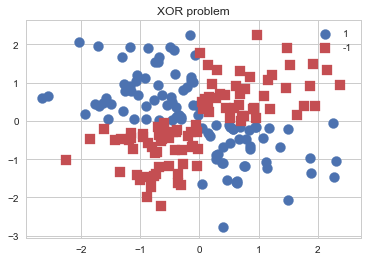

In [13]:
np.random.seed(0)
x_xor = np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:,0] > 0, x_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1) # np.where(조건,True일때 반환값, False일때 반환값)

plt.scatter(x_xor[y_xor==1,0], x_xor[y_xor==1,1], c='b', marker='o', label='1', s=100)
plt.scatter(x_xor[y_xor==-1,0], x_xor[y_xor==-1,1], c='r', marker='s', label='-1', s=100)
plt.legend()
plt.title("XOR problem")
plt.show()

In [17]:
def plot_xor(x_xor, y_xor, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    zz = np.reshape(model.predict(np.array([xx.ravel(), yy.ravel()]).T), xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(x_xor[y_xor==1,0], x_xor[y_xor==1,1], c='b', marker='o', label='1', s=100)
    plt.scatter(x_xor[y_xor==-1,0], x_xor[y_xor==-1,1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

In [18]:
from sklearn.svm import SVC

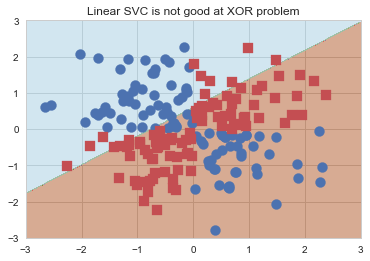

In [19]:
svc = SVC(kernel='linear').fit(x_xor, y_xor)
plot_xor(x_xor, y_xor, svc, "Linear SVC is not good at XOR problem")

XOR은 일반 SVM을 쓰면 분류가 불가능한 문제이다

##### 기저함수를 독립변수 벡터로 사용해보자

In [20]:
from sklearn.preprocessing import FunctionTransformer

In [21]:
def basis(x):
    return np.vstack([x[:,0]**2, np.sqrt(2)*x[:,0]*x[:,1], x[:,1]**2]).T

In [22]:
x = np.arange(8).reshape(4, 2)
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [23]:
basis(x)

array([[  0.        ,   0.        ,   1.        ],
       [  4.        ,   8.48528137,   9.        ],
       [ 16.        ,  28.28427125,  25.        ],
       [ 36.        ,  59.39696962,  49.        ]])

In [24]:
FunctionTransformer(func=basis).fit_transform(x)

array([[  0.        ,   0.        ,   1.        ],
       [  4.        ,   8.48528137,   9.        ],
       [ 16.        ,  28.28427125,  25.        ],
       [ 36.        ,  59.39696962,  49.        ]])

In [25]:
x_xor2 = FunctionTransformer(basis).fit_transform(x_xor)

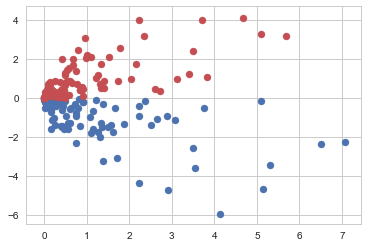

In [27]:
plt.scatter(x_xor2[y_xor==1,0], x_xor2[y_xor==1,1], c='b', s=50)
plt.scatter(x_xor2[y_xor==-1,0], x_xor2[y_xor==-1,1], c='r', s=50)
plt.show()

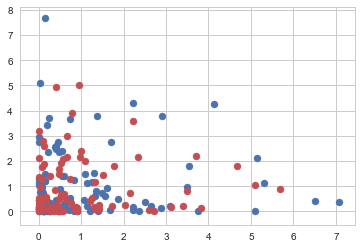

In [28]:
plt.scatter(x_xor2[y_xor==1,0], x_xor2[y_xor==1,2], c='b', s=50)
plt.scatter(x_xor2[y_xor==-1,0], x_xor2[y_xor==-1,2], c='r', s=50)
plt.show()

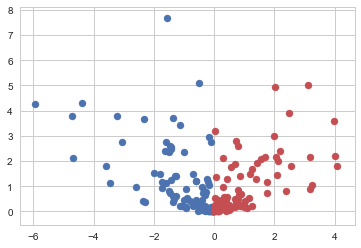

In [30]:
plt.scatter(x_xor2[y_xor==1,1], x_xor2[y_xor==1,2], c='b', s=50)
plt.scatter(x_xor2[y_xor==-1,1], x_xor2[y_xor==-1,2], c='r', s=50)
plt.show()

In [31]:
from sklearn.pipeline import Pipeline

In [57]:
basismodel = Pipeline([("basis",FunctionTransformer(basis)),("svc",SVC(kernel='linear'))]).fit(x_xor,y_xor)

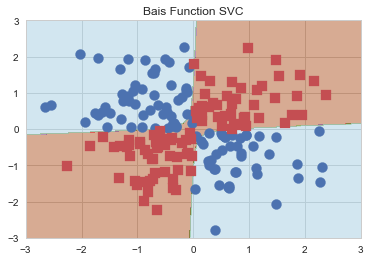

In [58]:
plot_xor(x_xor, y_xor, basismodel, "Bais Function SVC")

#### 많이 사용되는 커널 : 각각 사용되는 모수가  다름

##### 1. 다항 커널(Polynomial kernel)

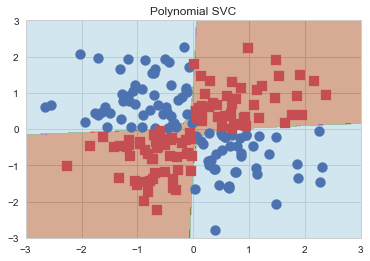

In [66]:
polysvc = SVC(kernel='poly', degree=2, gamma=1, coef0=0).fit(x_xor, y_xor)
plot_xor(x_xor, y_xor, polysvc, "Polynomial SVC")

##### 2. RBF/Gaussian Kernel

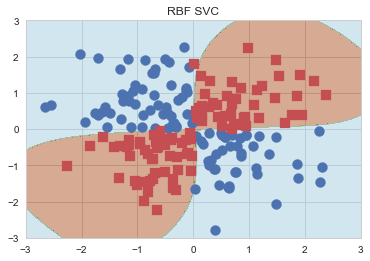

In [68]:
rbf = SVC(kernel='rbf').fit(x_xor, y_xor)
plot_xor(x_xor, y_xor, rbf, "RBF SVC")

##### 3. Sigmoid Kernel

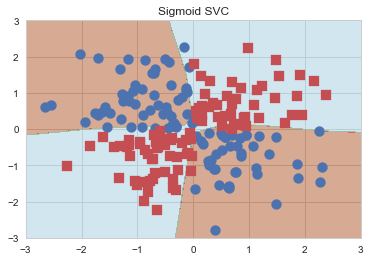

In [69]:
sigmo = SVC(kernel='sigmoid', gamma=2, coef0=2).fit(x_xor, y_xor)
plot_xor(x_xor, y_xor, sigmo, "Sigmoid SVC")

#### RBF의 gamma를 높이면 조금만 멀어도 유사도가 0이다. 

##### gamma = 2

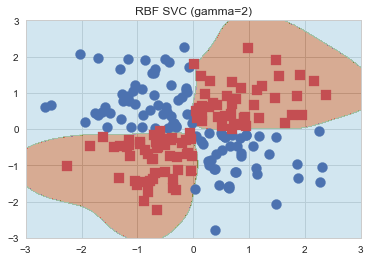

In [72]:
plot_xor(x_xor, y_xor, SVC(kernel="rbf", gamma=2).fit(x_xor, y_xor), "RBF SVC (gamma=2)")

##### gamma = 10

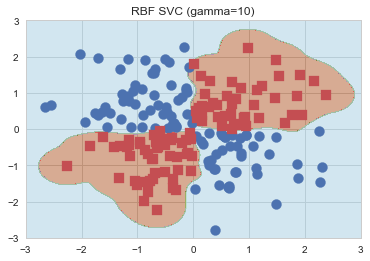

In [78]:
plot_xor(x_xor, y_xor, SVC(kernel="rbf", gamma=10).fit(x_xor, y_xor), "RBF SVC (gamma=10)")

##### gamma = 20

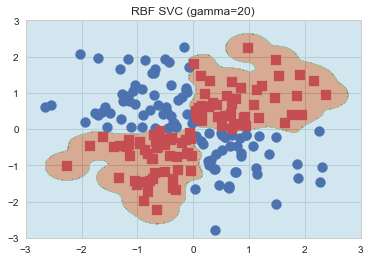

In [77]:
plot_xor(x_xor, y_xor, SVC(kernel="rbf", gamma=20).fit(x_xor, y_xor), "RBF SVC (gamma=20)")

##### gamma = 50

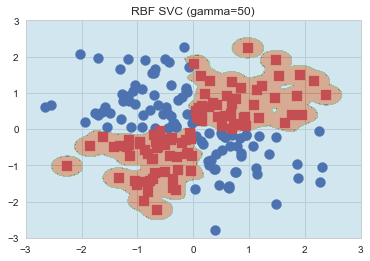

In [76]:
plot_xor(x_xor, y_xor, SVC(kernel="rbf", gamma=50).fit(x_xor, y_xor), "RBF SVC (gamma=50)")

##### gamma = 100

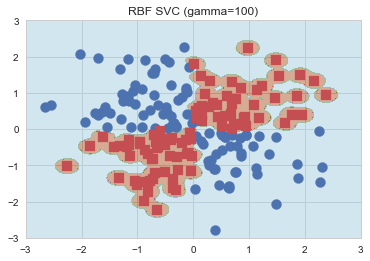

In [79]:
plot_xor(x_xor, y_xor, SVC(kernel="rbf", gamma=100).fit(x_xor, y_xor), "RBF SVC (gamma=100)")

데이터 하나하나 구분되어버린다.(overfitting)